# Assignment- Advanced Regression
## House Price Prediction Case Study

#### Brief about Assignment:  <br>
A US-based housing company named Surprise Housing has decided to enter the Australian market. The company uses data analytics to purchase houses at a price below their actual value and flip them at a higher price. For the same purpose, the company has collected a data set from house sales in Australia.<br>

The company is looking at prospective properties to buy to enter the market.

You are required to build a regression model using regularization, so as to predict the actual value of the prospective properties and decide whether to invest in them or not.

The company wants to know:

- Which variables are significant in predicting the price of a house

- How well those variables describe the price of a house <br>

#### Business Goal:
We are required to model the price of houses with the available independent variables. It will then be used by the management to understand how exactly the prices vary with the variables. They can accordingly manipulate the strategy of the firm and concentrate on areas that will yield high rewards. Further, the model will be a good way for management to understand the pricing dynamics of a new market



In [511]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler


from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.model_selection import GridSearchCV

import os

# hide warnings
import warnings
warnings.filterwarnings("ignore")

## Step 1. Data Understanding and Exploration

Let's first have a look at the dataset and understand the size, attribute names etc.

In [512]:
# reading the data into the house dataframe
df = pd.read_csv('train.csv')

In [513]:
# Check the head of the dataset
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [514]:
df.shape

(1460, 81)

There are **1460** rows and **81** columns in the dataset.

In [515]:
# Checking the column names and datatype of the df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [516]:
# printing the summary of numerical columns.
numerical_cols=df.select_dtypes(include=[int,float]).columns
df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [517]:
numerical_cols

Index(['Id', 'MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF',
       'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea',
       'MiscVal', 'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')

## Step 2. Data Cleaning

Let's now conduct some data cleaning steps. 


In [518]:
#First Let's drop the ID column as it is not adding any value to our Model
df.drop(['Id'], axis=1, inplace=True)

## Dealing with Null and Duplicated Values

In [519]:
# checking the duplicate rows in DataFrame
df.duplicated().sum()


0

In [520]:
# checking the percentage of nulls in each columns
null_perct=round(df.isnull().sum()/len(df)*100,2)

In [521]:
#Arranging the columns containing Null Values
null_perct[null_perct>0].sort_values(ascending=False)

PoolQC          99.52
MiscFeature     96.30
Alley           93.77
Fence           80.75
FireplaceQu     47.26
LotFrontage     17.74
GarageYrBlt      5.55
GarageType       5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [522]:
'''From data Dictionary it is clear that columnns MiscFeature and LotFrontage# are numerical columns with Null Values
meaning missing Data.'''
#So let's proceed with dropping these columns as they have high percentage of null values

df.drop(['MiscFeature','LotFrontage'], axis=1, inplace=True)

In [523]:
#Checking Null Values Again
null_perct=round(df.isnull().sum()/len(df)*100,2)
null_perct[null_perct>0].sort_values(ascending=False)

PoolQC          99.52
Alley           93.77
Fence           80.75
FireplaceQu     47.26
GarageQual       5.55
GarageFinish     5.55
GarageYrBlt      5.55
GarageType       5.55
GarageCond       5.55
BsmtFinType2     2.60
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtCond         2.53
BsmtQual         2.53
MasVnrArea       0.55
MasVnrType       0.55
Electrical       0.07
dtype: float64

In [524]:
'''Also the NA values in VnrType also mean missing values and the number of missing values is low, let's drop the rows 
for these'''

df.dropna(axis=0, inplace=True,subset=['MasVnrType'])

In [525]:
#After dropping the rows above, checking the percentage of Values we have out of the original Dataset
len(df)/1460*100

99.45205479452055

In [526]:
#Since GarageYrBlt is a Numerical column and null values in this column mean there is no Garage.
#let's replace the nulls of this column with 0

df[['GarageYrBlt']]=df[['GarageYrBlt']].fillna(0.0)

In [527]:
#For the rest of the columns(according to given data Dictionary), Null Values mean that particular feature is not present.
#So replacing them accordingly.
df.fillna('NotPresent',inplace = True)
df.shape

(1452, 78)

In [528]:
#Checking Null Values Again
null_perct=round(df.isnull().sum()/len(df)*100,2)
null_perct[null_perct>0].sort_values(ascending=False)

Series([], dtype: float64)

#### So there are No Null values Present in our DataFrame


## Step 3. Data Exploration

To perform linear regression, the (numeric) target variable should be linearly related to *at least one another numeric variable*. Let's see whether that's true in this case.


We'll first subset draw the correalation matrix for the list of all (independent) numeric variables.

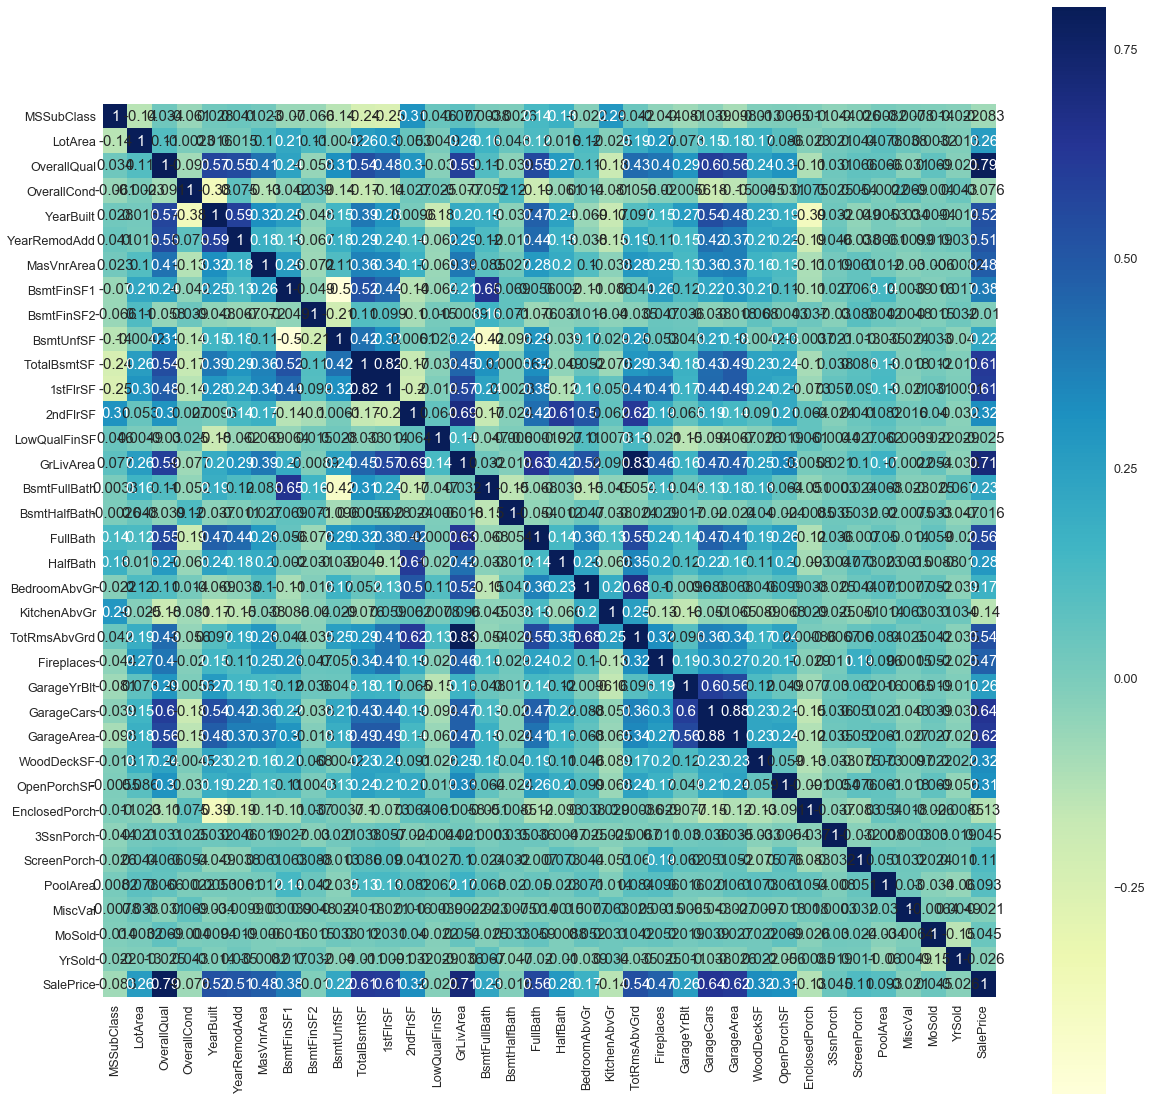

In [537]:
# Correlation Matrix Heatmap
corrmat = df.corr()
f, ax = plt.subplots(figsize=(20, 20))
sns.heatmap(corrmat, vmax=.8, annot=True, cmap="YlGnBu", square=True);

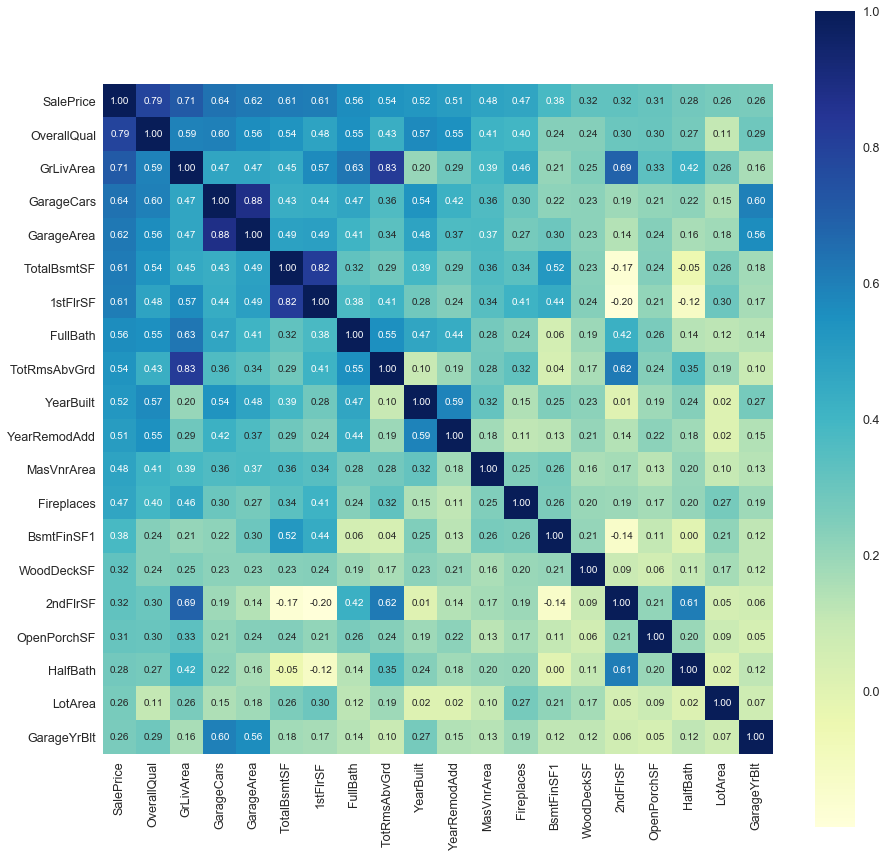

In [538]:
# Heatmap of top 20 variables correlated with SalePrice
k = 20 
cols = corrmat.nlargest(k, 'SalePrice')['SalePrice'].index
matrix = np.corrcoef(df[cols].values.T)
sns.set(font_scale=1.25)
f, ax = plt.subplots(figsize=(15, 15))
hm = sns.heatmap(matrix, cbar=True, cmap="YlGnBu", annot=True, square=True, fmt='.2f', annot_kws={'size': 10},
                                       yticklabels=cols.values, xticklabels=cols.values)
plt.show()

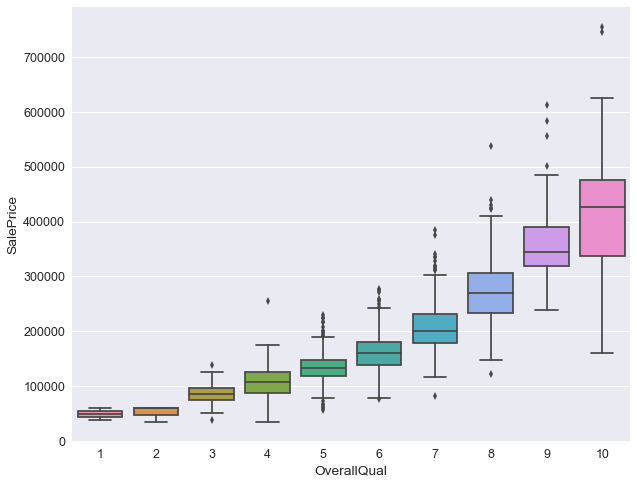

In [539]:
# Plotting the boxplot for Overall Quality vs Sale Price
data = pd.concat([df['SalePrice'], df['OverallQual']], axis=1)
f, ax = plt.subplots(figsize=(10, 8))
fig = sns.boxplot(x='OverallQual', y="SalePrice", data=data);

We can see the `SalePrice` of house is clearly increasing with `Quality Rating`

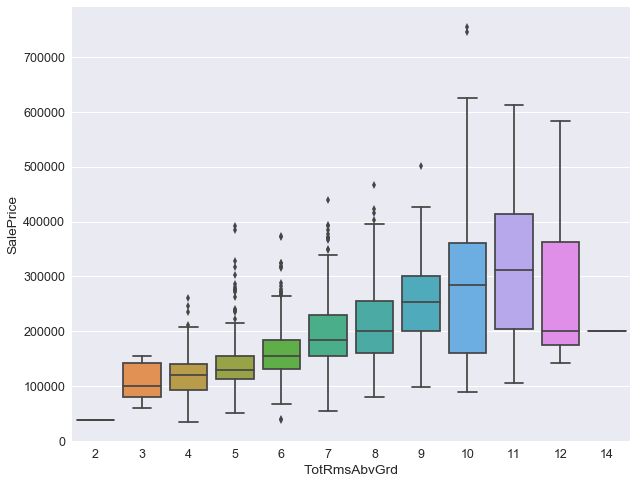

In [540]:
# Total Rooms vs Sale Price
f, ax = plt.subplots(figsize=(10, 8))
sns.boxplot(x=df['TotRmsAbvGrd'], y=df['SalePrice']);


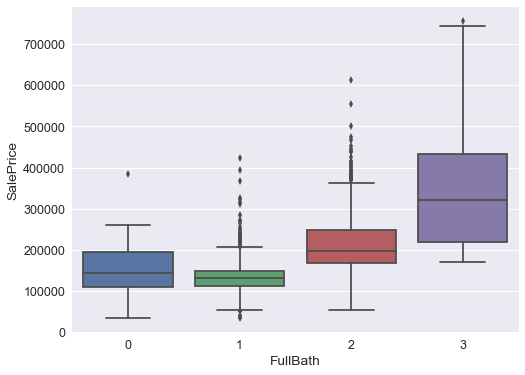

In [541]:
# Full bathrooms above grade  vs Sale Price
f, ax = plt.subplots(figsize=(8, 6))
sns.boxplot(x=df['FullBath'], y=df['SalePrice']);

Also the price is increasing with increasing `Number of Rooms` , `Number of Bathrooms`

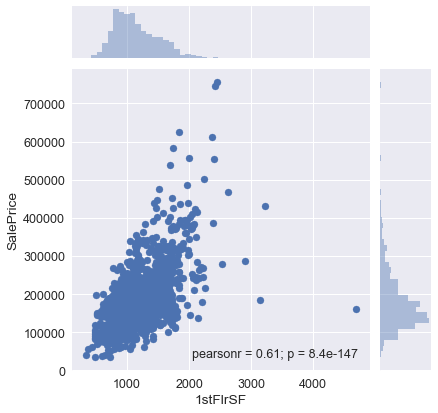

In [542]:
# total surface area vs Sale Price
sns.jointplot(x=df['1stFlrSF'], y=df['SalePrice']);

Price is Increasing with Increase in surface area

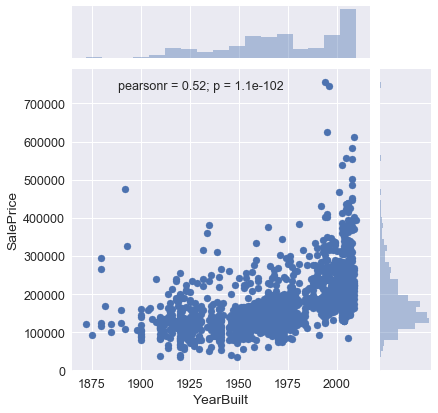

In [543]:
# Age  of house vs Sale Price
sns.jointplot(x=df['YearBuilt'], y=df['SalePrice']);

As we can see Newely built house tend to have more SalePrice Associated with them



## Step 4 : Data Preparation and Feature transformation: 

Let's now prepare the data and build the model.

In [544]:
numerical_cols=df.select_dtypes(include=[int,float]).columns

### Dummy Variable Creation for Categorical Variables

In [545]:
df = pd.get_dummies(df, drop_first=True)

In [546]:
df.shape

(1452, 256)

## Train_test Split

In [547]:
from sklearn.model_selection import train_test_split
train_df,test_df = train_test_split(df,train_size=0.7,test_size=0.3, random_state=42 )
print(len(train_df), len(test_df))

1016 436


### Scaling Numerical Features

In [548]:
scaler = MinMaxScaler()
train_df[numerical_cols] = scaler.fit_transform(train_df[numerical_cols])
train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
436,0.176471,0.018976,0.555556,0.857143,0.350365,0.000000,0.000000,0.000000,0.0,0.277397,...,0,0,0,0,1,0,0,0,1,0
1296,0.000000,0.045299,0.444444,0.571429,0.664234,0.216667,0.126496,0.137491,0.0,0.147260,...,0,0,0,0,1,0,0,0,1,0
624,0.235294,0.055705,0.555556,0.428571,0.729927,0.366667,0.246154,0.043763,0.0,0.207620,...,0,0,0,0,1,0,0,0,1,0
593,0.588235,0.019191,0.555556,0.428571,0.956204,0.883333,0.145299,0.121368,0.0,0.069777,...,0,0,0,0,1,0,0,0,1,0
632,0.000000,0.064887,0.666667,0.428571,0.766423,0.450000,0.178632,0.145641,0.0,0.241438,...,0,0,0,0,1,0,0,1,0,0


In [549]:
#transforming the numerical columns of Test Data
test_df[numerical_cols] = scaler.transform(test_df[numerical_cols])
train_df.head()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
436,0.176471,0.018976,0.555556,0.857143,0.350365,0.000000,0.000000,0.000000,0.0,0.277397,...,0,0,0,0,1,0,0,0,1,0
1296,0.000000,0.045299,0.444444,0.571429,0.664234,0.216667,0.126496,0.137491,0.0,0.147260,...,0,0,0,0,1,0,0,0,1,0
624,0.235294,0.055705,0.555556,0.428571,0.729927,0.366667,0.246154,0.043763,0.0,0.207620,...,0,0,0,0,1,0,0,0,1,0
593,0.588235,0.019191,0.555556,0.428571,0.956204,0.883333,0.145299,0.121368,0.0,0.069777,...,0,0,0,0,1,0,0,0,1,0
632,0.000000,0.064887,0.666667,0.428571,0.766423,0.450000,0.178632,0.145641,0.0,0.241438,...,0,0,0,0,1,0,0,1,0,0


In [550]:
train_df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,...,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000,1016.000000
mean,0.223830,0.056940,0.566710,0.509702,0.725358,0.581529,0.087815,0.076607,0.030027,0.248812,...,0.001969,0.002953,0.093504,0.001969,0.861220,0.003937,0.006890,0.015748,0.807087,0.095472
std,0.253507,0.058946,0.152250,0.158745,0.219719,0.342639,0.150632,0.081546,0.108637,0.192053,...,0.044346,0.054286,0.291281,0.044346,0.345887,0.062653,0.082759,0.124560,0.394780,0.294011
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.037953,0.444444,0.428571,0.598540,0.283333,0.000000,0.000000,0.000000,0.101777,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.050741,0.555556,0.428571,0.729927,0.716667,0.000000,0.065202,0.000000,0.211901,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
75%,0.294118,0.063636,0.666667,0.571429,0.941606,0.900000,0.138675,0.123893,0.000000,0.348245,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [551]:
test_df.describe()

,MSSubClass,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,...,SaleType_ConLI,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
count,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,436.000000,...,436.000000,436.000000,436.000000,436.000000,436.000000,436.0,436.000000,436.000000,436.000000,436.000000
mean,0.202240,0.055015,0.563965,0.515072,0.719095,0.575076,0.090494,0.082273,0.035779,0.228633,...,0.006881,0.004587,0.055046,0.002294,0.887615,0.0,0.009174,0.009174,0.857798,0.057339
std,0.237972,0.066054,0.156456,0.159777,0.222145,0.348189,0.164133,0.078576,0.112224,0.181977,...,0.082759,0.067651,0.228332,0.047891,0.316203,0.0,0.095452,0.095452,0.349658,0.232757
min,0.000000,0.001083,0.000000,-0.142857,0.021898,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.038458,0.444444,0.428571,0.589416,0.250000,0.000000,0.000000,0.000000,0.084653,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
50%,0.176471,0.048347,0.555556,0.428571,0.740876,0.733333,0.000000,0.074327,0.000000,0.184717,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
75%,0.250000,0.061813,0.666667,0.571429,0.934307,0.883333,0.144658,0.129740,0.000000,0.334225,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.0,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.309654,1.000000,1.000000,1.007299,1.000000,1.367521,0.400425,0.721167,0.907962,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,1.000000


### Splitting features into Predictor Variables X and Target Variable y

In [552]:
X_train=train_df.drop('SalePrice',axis=1)
y_train=train_df.SalePrice
X_test=test_df.drop('SalePrice',axis=1)
y_test=test_df.SalePrice

## Step 5. Model Building and Evaluation

In [574]:
# list of alphas to tune
params = {'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 
 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 
 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]}

In [575]:
ridge = Ridge()
#ridge model for finding optimal Value of Alpha
ridge_model_cv = GridSearchCV(estimator = ridge, param_grid=params, cv = 5 , scoring= 'neg_mean_absolute_error', 
                              return_train_score=True,verbose = 1)

In [576]:
ridge_model_cv.fit(X_train,y_train)

Fitting 5 folds for each of 26 candidates, totalling 130 fits


[Parallel(n_jobs=1)]: Done 130 out of 130 | elapsed:    1.4s finished


GridSearchCV(cv=5, error_score='raise',
       estimator=Ridge(alpha=1.0, copy_X=True, fit_intercept=True, max_iter=None,
   normalize=False, random_state=None, solver='auto', tol=0.001),
       fit_params=None, iid=True, n_jobs=1,
       param_grid={'alpha': [0.0001, 0.001, 0.01, 0.05, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0, 20, 50, 100]},
       pre_dispatch='2*n_jobs', refit=True, return_train_score=True,
       scoring='neg_mean_absolute_error', verbose=1)

In [577]:
ridge_model_cv.best_params_

{'alpha': 5.0}

In [557]:
#Converting the Results of Ridge model into a DataFrame 
cv_results = pd.DataFrame(ridge_model_cv.cv_results_)
cv_results = cv_results[cv_results['param_alpha']<=200]
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.015410,0.000996,-0.030887,-0.016342,0.0001,{'alpha': 0.0001},24,-0.028480,-0.015406,-0.029841,...,-0.034069,-0.015868,-0.032535,-0.016456,-0.029522,-0.016232,0.006095,0.000114,0.002078,0.000789
1,0.008297,0.000761,-0.029794,-0.016417,0.001,{'alpha': 0.001},23,-0.028439,-0.015402,-0.029668,...,-0.029040,-0.016216,-0.032392,-0.016456,-0.029437,-0.016253,0.001402,0.000032,0.001364,0.000762
2,0.007796,0.000798,-0.029550,-0.016599,0.01,{'alpha': 0.01},22,-0.028299,-0.015521,-0.028357,...,-0.030649,-0.016510,-0.031575,-0.016561,-0.028877,-0.016518,0.000504,0.000096,0.001323,0.000752
3,0.012298,0.000947,-0.029106,-0.017416,0.05,{'alpha': 0.05},21,-0.029085,-0.016625,-0.026012,...,-0.030767,-0.016644,-0.030680,-0.017500,-0.028985,-0.017500,0.004434,0.000176,0.001721,0.000797
4,0.007476,0.000770,-0.028956,-0.018052,0.1,{'alpha': 0.1},20,-0.029643,-0.017464,-0.025070,...,-0.030489,-0.016746,-0.030460,-0.018300,-0.029112,-0.018191,0.000206,0.000023,0.002010,0.000939


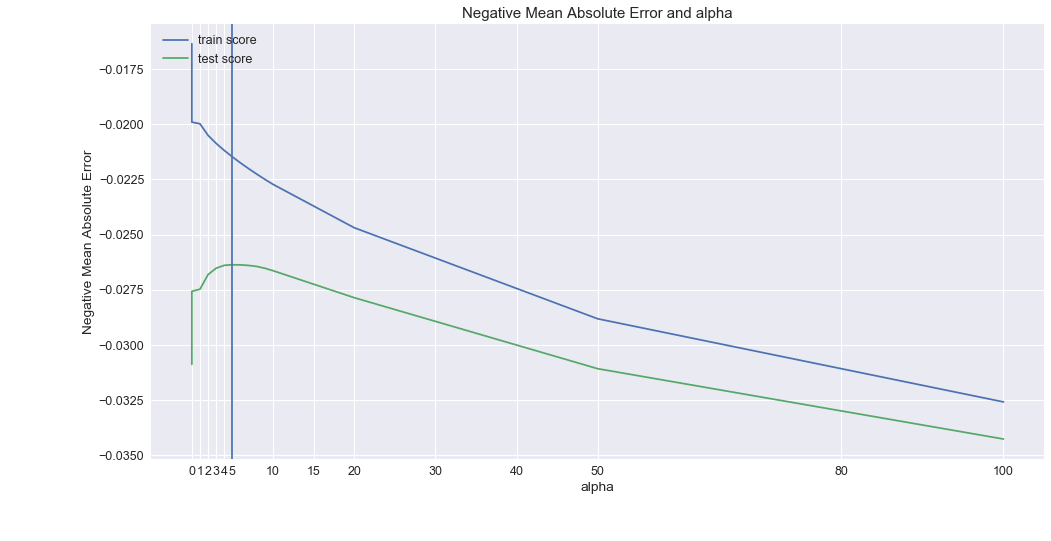

In [558]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha'].astype('int32')

# plotting the Results
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], cv_results['mean_train_score'])
plt.plot(cv_results['param_alpha'], cv_results['mean_test_score'])
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')
plt.axvline(x=5)
plt.annotate('local max', xy=(2, 1), xytext=(3, 1.5),
            arrowprops=dict(facecolor='black', shrink=0.05),
            )
plt.annotate(s='alpha 3',xy=(3,0), xytext =(3,0),annotation_clip=True)
plt.xticks([0,1,2,3,4,5,10,15,20,30,40,50,80,100])
plt.show()

As we can see clearly from the Graph above the best Scores for Test Data are present at alpha = 5

In [582]:
# Building the new model with Alpha = 5
alpha = 5
ridge = Ridge(alpha=alpha)

ridge.fit(X_train, y_train)
ridge.coef_

array([-2.45012633e-02,  2.16793289e-02,  7.90032279e-02,  3.72925038e-02,
        9.69378708e-03,  1.18525588e-02,  4.58568896e-02,  2.14066285e-02,
        3.61330356e-03,  7.20763882e-03,  2.34013199e-02,  5.53788594e-02,
        7.65966116e-02,  1.42715457e-03,  7.54200084e-02,  2.49974428e-02,
       -9.37061334e-04,  4.64347454e-02,  1.05199445e-02,  4.30157674e-03,
       -1.49416384e-02,  4.93244798e-02,  2.73077437e-02, -1.77510786e-03,
        5.17845380e-02,  1.76471441e-02,  2.50992052e-02,  8.77079548e-03,
        9.37179323e-03,  1.39619046e-02,  2.00677543e-02,  2.22684533e-02,
       -3.13353497e-03, -3.63190162e-03, -2.72902366e-03,  1.05762136e-02,
        2.98596915e-03,  9.98912366e-03,  3.42084127e-03,  2.49929627e-03,
       -3.41851859e-04,  2.10568855e-03,  1.60471902e-02, -2.63835291e-02,
       -1.07120133e-03,  2.11479100e-02, -1.97731372e-03,  1.65344908e-02,
       -7.59407922e-03,  1.57511238e-02, -1.55406204e-02, -2.08178870e-03,
       -3.61593236e-03,  

In [583]:
# predicting values for Test Data
y_pred =ridge.predict(X_test)
y_train_pred=ridge.predict(X_train)

In [584]:
# Checking the r2_Score on Test Data
from sklearn.metrics import r2_score
print('test_score %2.2f' % r2_score(y_test,y_pred))
print('Train_score %2.2f'% r2_score(y_train,y_train_pred))

test_score 0.86
Train_score 0.90


## Feature Selection and Lasso Model

In [585]:
params = {'alpha':[0.0001, 0.0002, 0.0005,0.0006,0.0007, 0.001,0.005]}
lasso_cv=Lasso()

lasso_model_cv= GridSearchCV(estimator = lasso_cv, param_grid=params, scoring = 'neg_mean_squared_log_error', 
                        cv = 5,return_train_score=True,verbose = 1)


In [586]:
lasso_model_cv.fit(X_train,y_train)
cv_results= pd.DataFrame(lasso_model_cv.cv_results_)


Fitting 5 folds for each of 7 candidates, totalling 35 fits


[Parallel(n_jobs=1)]: Done  35 out of  35 | elapsed:    0.8s finished


In [587]:
cv_results.head()

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,...,split2_test_score,split2_train_score,split3_test_score,split3_train_score,split4_test_score,split4_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.055675,0.001117,-0.001219,-0.000598,0.0001,{'alpha': 0.0001},5,-0.001241,-0.000581,-0.000596,...,-0.002325,-0.000466,-0.000919,-0.000626,-0.001015,-0.000642,0.017994,0.000158,0.000590,0.000073
1,0.022670,0.001142,-0.001145,-0.000674,0.0002,{'alpha': 0.0002},3,-0.001232,-0.000642,-0.000458,...,-0.002101,-0.000528,-0.000964,-0.000702,-0.000971,-0.000723,0.004366,0.000248,0.000539,0.000085
2,0.014464,0.001082,-0.001119,-0.000853,0.0005,{'alpha': 0.0005},1,-0.001344,-0.000809,-0.000486,...,-0.001766,-0.000698,-0.001049,-0.000878,-0.000949,-0.000908,0.004119,0.000254,0.000425,0.000093
3,0.010948,0.000921,-0.001144,-0.000910,0.0006,{'alpha': 0.0006},2,-0.001388,-0.000864,-0.000518,...,-0.001738,-0.000757,-0.001096,-0.000934,-0.000978,-0.000963,0.000818,0.000050,0.000409,0.000093
4,0.009810,0.000923,-0.001177,-0.000965,0.0007,{'alpha': 0.0007},4,-0.001426,-0.000915,-0.000556,...,-0.001728,-0.000813,-0.001152,-0.000995,-0.001021,-0.001017,0.000494,0.000055,0.000394,0.000094


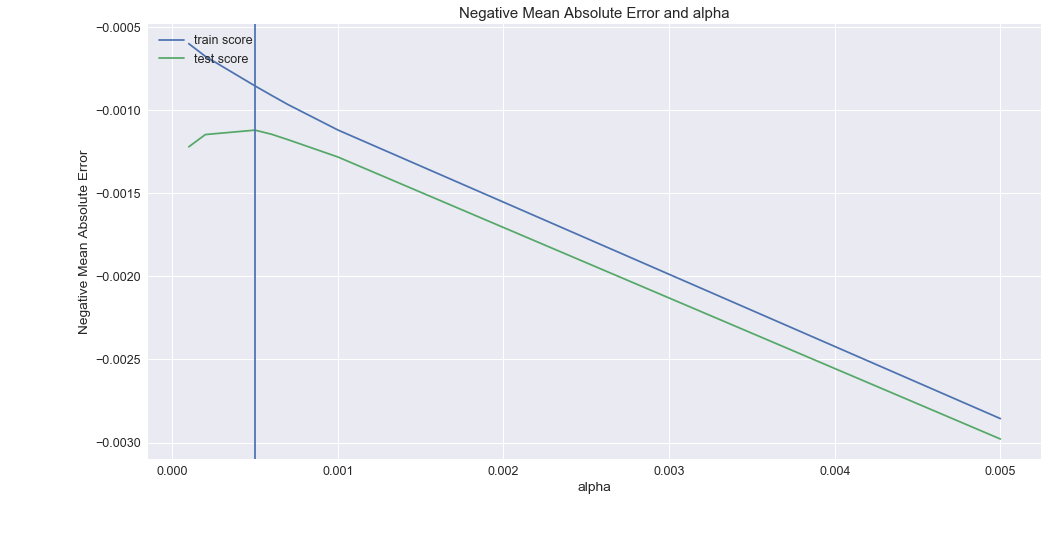

In [588]:
# plotting mean test and train scoes with alpha 
cv_results['param_alpha'] = cv_results['param_alpha']

# plotting the Results
plt.figure(figsize=(16,8))
plt.plot(cv_results['param_alpha'], (cv_results['mean_train_score']))
plt.plot(cv_results['param_alpha'], (cv_results['mean_test_score']))
plt.xlabel('alpha')
plt.ylabel('Negative Mean Absolute Error')
plt.title("Negative Mean Absolute Error and alpha")
plt.legend(['train score', 'test score'], loc='upper left')

plt.axvline(x=0.0005)           
plt.annotate(s='alpha 3',xy=(3,0), xytext =(3,0),annotation_clip=True)

plt.show()

As we can see clearly from the Graph above the best Scores for Test Data are present at alpha = 0.0005

In [589]:
lasso_model_cv.best_params_

{'alpha': 0.0005}

In [590]:
lasso= Lasso(alpha=0.0005)
lasso.fit(X_train,y_train)

Lasso(alpha=0.0005, copy_X=True, fit_intercept=True, max_iter=1000,
   normalize=False, positive=False, precompute=False, random_state=None,
   selection='cyclic', tol=0.0001, warm_start=False)

In [591]:
lasso.coef_

array([-0.03697499,  0.        ,  0.14331824,  0.01980289,  0.        ,
        0.01986024,  0.03221368,  0.        ,  0.        ,  0.        ,
        0.        ,  0.        ,  0.00997164, -0.        ,  0.27899928,
        0.02053185, -0.        ,  0.0202139 ,  0.        ,  0.        ,
       -0.        ,  0.        ,  0.01588626,  0.        ,  0.06162096,
        0.        ,  0.01487673,  0.        , -0.        ,  0.        ,
        0.        ,  0.        , -0.        , -0.        , -0.        ,
        0.        , -0.        ,  0.        , -0.01047721, -0.        ,
        0.        , -0.        ,  0.00305819, -0.        , -0.00156684,
        0.        ,  0.        ,  0.        , -0.        ,  0.01481926,
       -0.        , -0.        , -0.        ,  0.00356351, -0.        ,
       -0.        ,  0.        ,  0.        ,  0.        , -0.        ,
        0.01625861, -0.01009904, -0.        , -0.        , -0.        ,
       -0.        , -0.00275723,  0.        , -0.        ,  0.04

In [592]:
y_pred =lasso.predict(X_test)
y_train_pred=lasso.predict(X_train)

In [593]:
from sklearn.metrics import r2_score
print('test_score %2.2f' % r2_score(y_test,y_pred))
print('Train_score %2.2f'% r2_score(y_train,y_train_pred))

test_score 0.86
Train_score 0.87


In [594]:
r2_score(y_train,y_train_pred)

0.8652601082580035

### Feature Selection sorted by their Importance

In [596]:
# Displaying the top 20 Features according to their importance and predictive power
features = pd.DataFrame({'Features':X_train.columns,'Coefficient' :lasso.coef_,'Coefficient_abs': np.abs(lasso.coef_)})

features=features.sort_values(by='Coefficient_abs',ascending=False)[['Features','Coefficient']]
features.head(20)

,Features,Coefficient
14,GrLivArea,0.278999
2,OverallQual,0.143318
24,GarageCars,0.061621
69,Neighborhood_NoRidge,0.047015
116,RoofMatl_WdShngl,0.046517
70,Neighborhood_NridgHt,0.039259
76,Neighborhood_StoneBr,0.037125
0,MSSubClass,-0.036975
6,MasVnrArea,0.032214
202,KitchenQual_TA,-0.028867


In [597]:
# Displaying the least 10 Features according to their importance and predictive power
features.tail(10)

,Features,Coefficient
100,HouseStyle_2.5Fin,-0.0
101,HouseStyle_2.5Unf,-0.0
102,HouseStyle_2Story,-0.0
103,HouseStyle_SFoyer,-0.0
104,HouseStyle_SLvl,-0.0
106,RoofStyle_Gambrel,0.0
108,RoofStyle_Mansard,0.0
109,RoofStyle_Shed,0.0
110,RoofMatl_CompShg,0.0
254,SaleCondition_Partial,0.0


As we can see Clearly from above Table that the lasso Regu;arization has decreased the Coefficients of least important variable nearly equal to zero 